# Minimal Data Inspection and Dataset Splitting

We load in the data, inspect targets for outliers and missing values - using empirical pdf. We then make judgements on how to handle these potential issues.


We'll start with the Ciprofolxacin data with restricted features derived from genomics scans against databases.

In [96]:
filepath = './../../DataSets/ResistanceCiprofloxacinStrict.tsv.gz'

In [97]:
import pandas as pd

In [98]:
df = pd.read_csv(filepath, sep='\t', compression='gzip')

/var/folders/p9/vwq0gfs15vb07tg6xw1r14180000gn/T/ipykernel_14774/2619055371.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath, sep='\t', compression='gzip')


In [99]:
df.shape

(3881, 880)

Data set is small. Be careful to use:

* stratified sampling over target classes
* K-fold cross validation

In [100]:
df.head()

,accession,genus,species,phenotype,mic,3005053,3000830,3003838,3000508,3003890,...,3007751-D87Y,3003926-D87Y,3003709-G46S,3004851-A39T,3004832-A501P,3003381-R20H,3003926-S83I,3003381-G121D,3004832-T483S,3004832-A311V
0,SRR3138666,Campylobacter,jejuni,Susceptible,0.12,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,SRR3138667,Campylobacter,jejuni,Susceptible,0.06,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,SRR3138668,Campylobacter,jejuni,Susceptible,0.06,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,SRR3138669,Campylobacter,jejuni,Susceptible,0.06,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,SRR3138670,Campylobacter,jejuni,Susceptible,0.06,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [101]:
df.describe(include='all')

,accession,genus,species,phenotype,mic,3005053,3000830,3003838,3000508,3003890,...,3007751-D87Y,3003926-D87Y,3003709-G46S,3004851-A39T,3004832-A501P,3003381-R20H,3003926-S83I,3003381-G121D,3004832-T483S,3004832-A311V
count,3881,3881,3881,2818,2818.000000,3881.000000,3881.000000,3881.000000,3881.000000,3881.000000,...,3881.000000,3881.000000,3881.0,3881.000000,3881.000000,3881.0,3881.0,3881.0,3881.000000,3881.000000
unique,3881,4,4,2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,SRR3138666,Salmonella,enterica,Susceptible,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,2841,2841,2604,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,0.918746,0.782273,0.780984,0.037619,0.049729,0.748003,...,0.001288,0.003350,0.0,0.000258,0.000258,0.0,0.0,0.0,0.001288,0.001288
std,NaN,NaN,NaN,NaN,4.215741,0.414001,0.413633,0.190298,0.218596,0.434215,...,0.035875,0.057787,0.0,0.016052,0.016052,0.0,0.0,0.0,0.035875,0.035875
min,NaN,NaN,NaN,NaN,0.002000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,0.015000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000
50%,NaN,NaN,NaN,NaN,0.015000,1.000000,1.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000
75%,NaN,NaN,NaN,NaN,0.030000,1.000000,1.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000


## Labels
Labels are mic and phenotype. 

### mic

mic is the minimum inhibitory concentration of an antibiotic. It is a continuous variable.

### phenotype

The phenotype is a binary variable. It is 1 if the bacteria is resistant to the antibiotic, and 0 otherwise.


Let's inspect how they look, both univariate and bivariate.

In [102]:
# Checking for missing values
missing_values = df[['mic', 'phenotype']].isnull().sum()
print("Missing values in 'mic':", missing_values['mic'])
print("Missing values in 'phenotype':", missing_values['phenotype'])

Missing values in 'mic': 1063
Missing values in 'phenotype': 1063


In [103]:
import seaborn as sns

import matplotlib.pyplot as plt

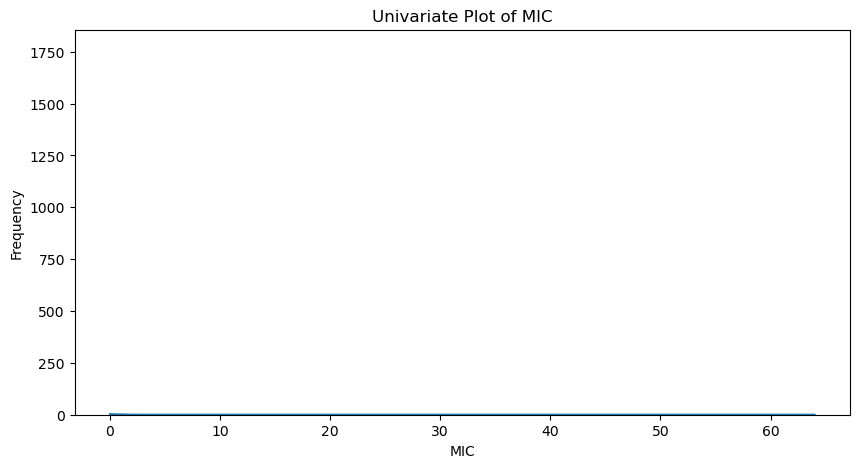

In [104]:
# Univariate plot for 'mic'
plt.figure(figsize=(10, 5))
sns.histplot(df['mic'], kde=True)
plt.title('Univariate Plot of MIC')
plt.xlabel('MIC')
plt.ylabel('Frequency')
plt.show()




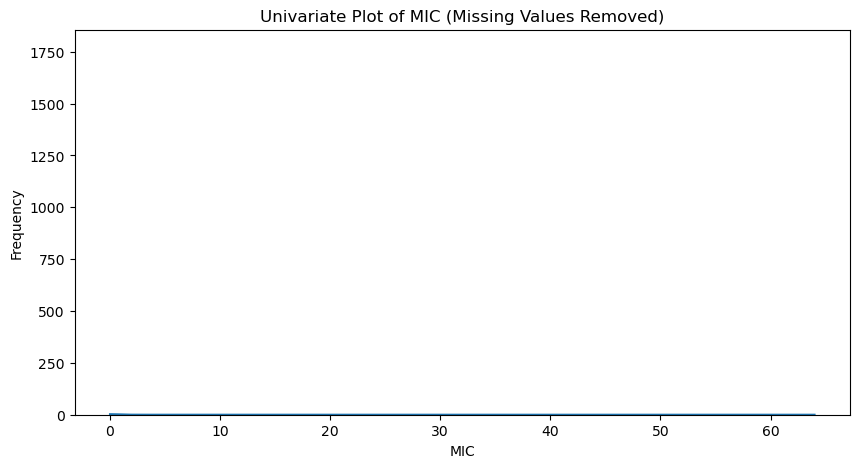

In [105]:
# Remove missing values for 'mic'
df_mic_clean = df['mic'].dropna()

# Univariate plot for 'mic' without missing values
plt.figure(figsize=(10, 5))
sns.histplot(df_mic_clean, kde=True)
plt.title('Univariate Plot of MIC (Missing Values Removed)')
plt.xlabel('MIC')
plt.ylabel('Frequency')
plt.show()

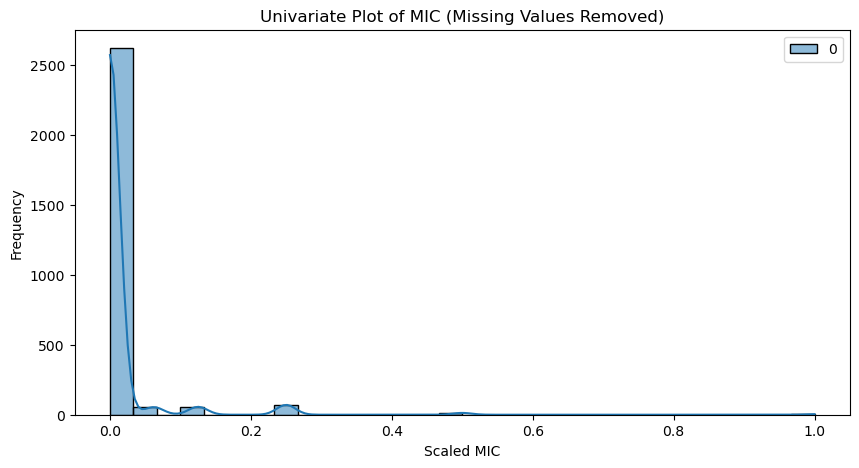

In [106]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

# Remove missing values for 'mic'
df_mic_clean = df['mic'].dropna()

# Scale the 'mic' values
scaler = MinMaxScaler()
df_mic_scaled = scaler.fit_transform(df_mic_clean.values.reshape(-1, 1))

# Univariate plot for 'mic' without missing values
plt.figure(figsize=(10, 5))
sns.histplot(df_mic_scaled, bins=30, kde=True)
plt.title('Univariate Plot of MIC (Missing Values Removed)')
plt.xlabel('Scaled MIC')
plt.ylabel('Frequency')
plt.show()

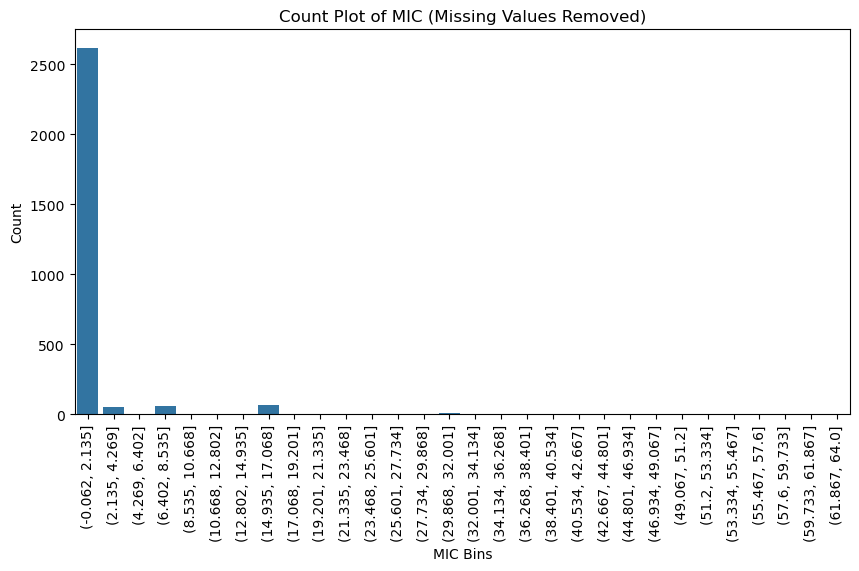

In [107]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Remove missing values for 'mic'
df_mic_clean = df['mic'].dropna()

# Bin the 'mic' values into categories
bins = pd.cut(df_mic_clean, bins=30)

# Univariate count plot for 'mic' without missing values
plt.figure(figsize=(10, 5))
sns.countplot(x=bins)
plt.xticks(rotation=90)
plt.title('Count Plot of MIC (Missing Values Removed)')
plt.xlabel('MIC Bins')
plt.ylabel('Count')
plt.show()

In [108]:
unique_values_count = df['mic'].nunique()
print(f"Number of unique values in 'mic': {unique_values_count} out of {df.shape[0]}  non-missing observations")

Number of unique values in 'mic': 21 out of 3881  non-missing observations


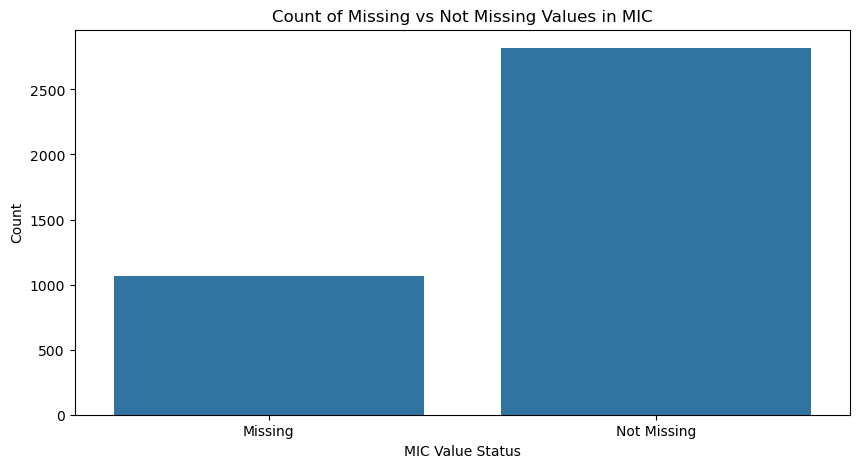

In [109]:
# Bar plot for missing vs not missing values in 'mic'
plt.figure(figsize=(10, 5))
sns.barplot(x=['Missing', 'Not Missing'], y=[missing_values['mic'], df.shape[0] - missing_values['mic']])
plt.title('Count of Missing vs Not Missing Values in MIC')
plt.xlabel('MIC Value Status')
plt.ylabel('Count')
plt.show()



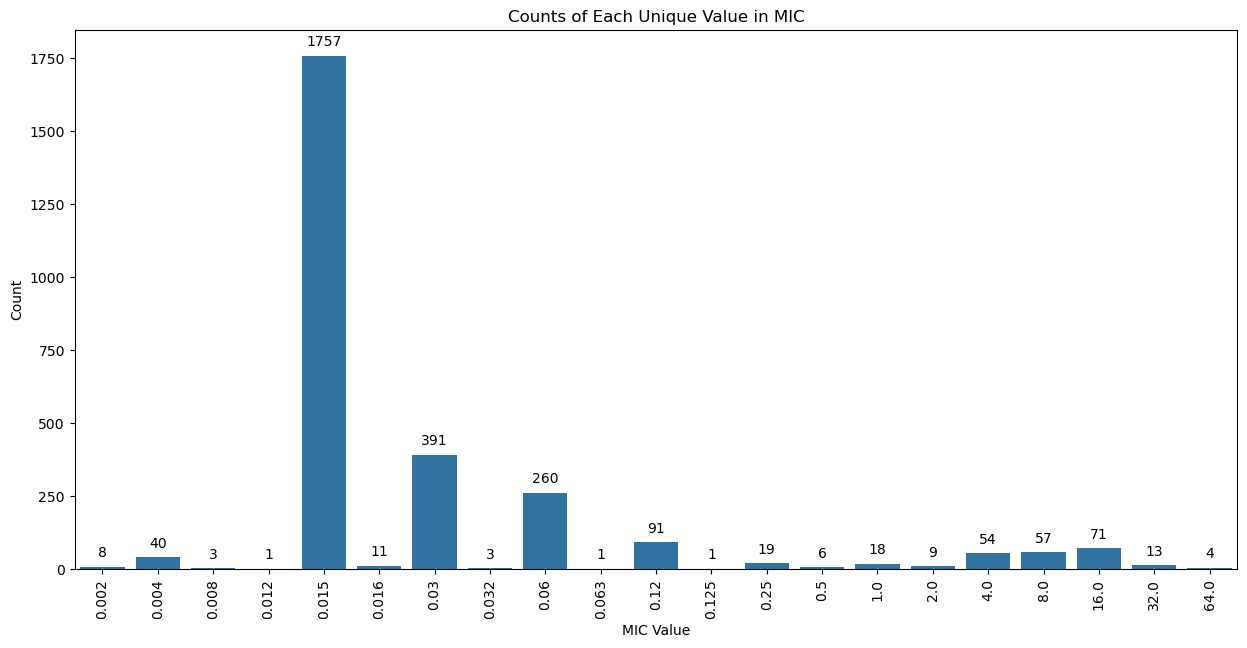

In [110]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming df is your DataFrame and 'mic' is the column of interest
mic_value_counts = df['mic'].value_counts().sort_index()

# Bar plot for counts of each unique value in 'mic'
plt.figure(figsize=(15, 7))
ax = sns.barplot(x=mic_value_counts.index, y=mic_value_counts.values)
plt.title('Counts of Each Unique Value in MIC')
plt.xlabel('MIC Value')
plt.ylabel('Count')
plt.xticks(rotation=90)

# Annotate each bar with its count
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

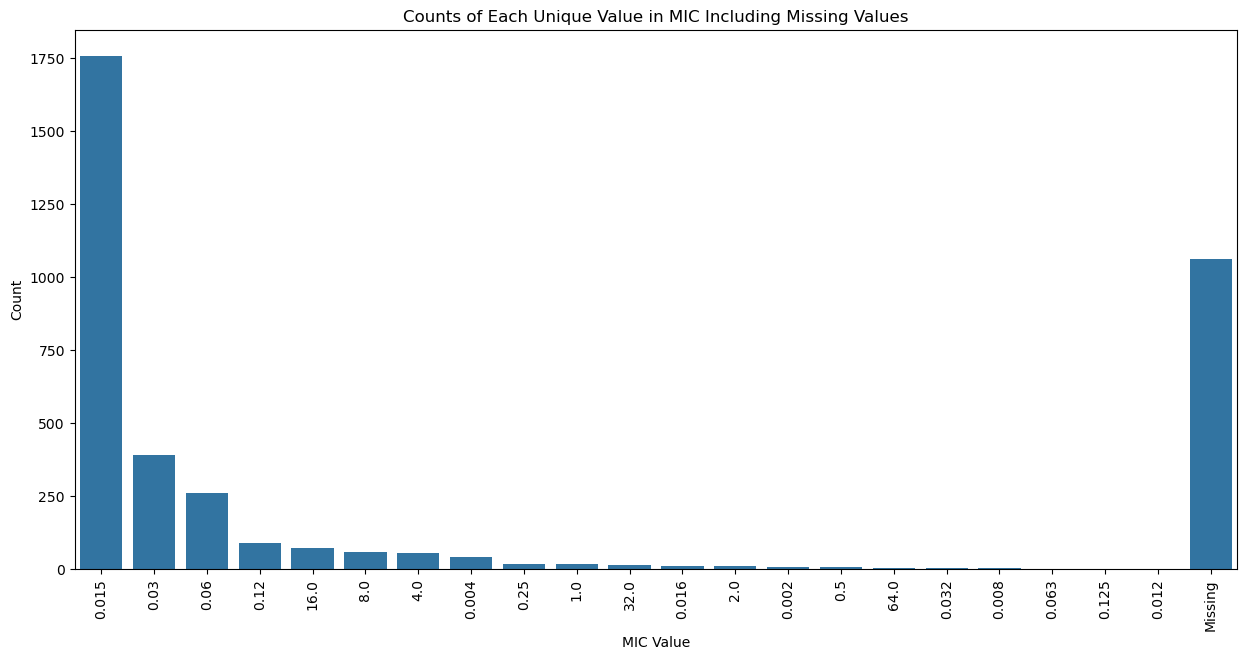

In [111]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming df is your DataFrame and 'mic' is the column of interest
mic_value_counts = df['mic'].value_counts()
missing_values = df['mic'].isna().sum()

# Create a new Series to include missing values count
mic_counts_with_missing = pd.concat([mic_value_counts, pd.Series({'Missing': missing_values})])

# Bar plot for counts of each unique value in 'mic' including missing values
plt.figure(figsize=(15, 7))
sns.barplot(x=mic_counts_with_missing.index, y=mic_counts_with_missing.values)
plt.title('Counts of Each Unique Value in MIC Including Missing Values')
plt.xlabel('MIC Value')
plt.ylabel('Count')
plt.xticks(rotation=90)
# Annotate each bar with its count

plt.show()

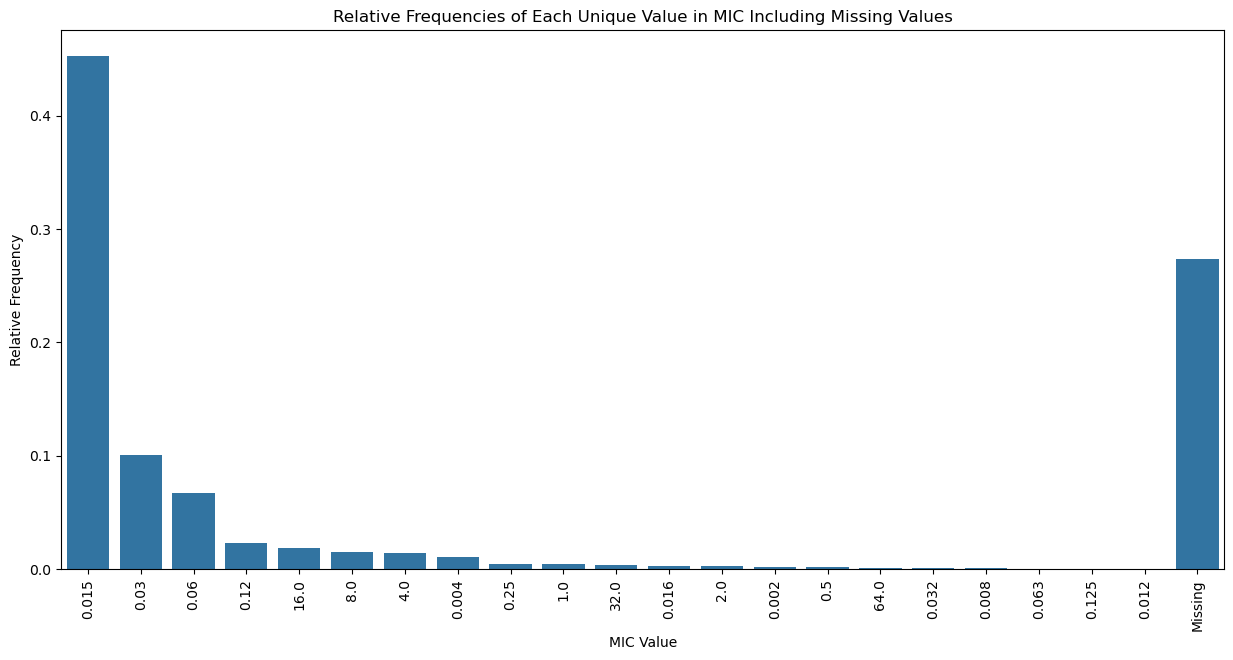

In [112]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming df is your DataFrame and 'mic' is the column of interest
mic_value_counts = df['mic'].value_counts()
missing_values = df['mic'].isna().sum()

# Create a new Series to include missing values count
mic_counts_with_missing = pd.concat([mic_value_counts, pd.Series({'Missing': missing_values})])

# Normalize the counts to get relative frequencies
total_count = mic_counts_with_missing.sum()
mic_counts_relative = mic_counts_with_missing / total_count

# Bar plot for relative frequencies of each unique value in 'mic' including missing values
plt.figure(figsize=(15, 7))
sns.barplot(x=mic_counts_relative.index, y=mic_counts_relative.values)
plt.title('Relative Frequencies of Each Unique Value in MIC Including Missing Values')
plt.xlabel('MIC Value')
plt.ylabel('Relative Frequency')
plt.xticks(rotation=90)
plt.show()

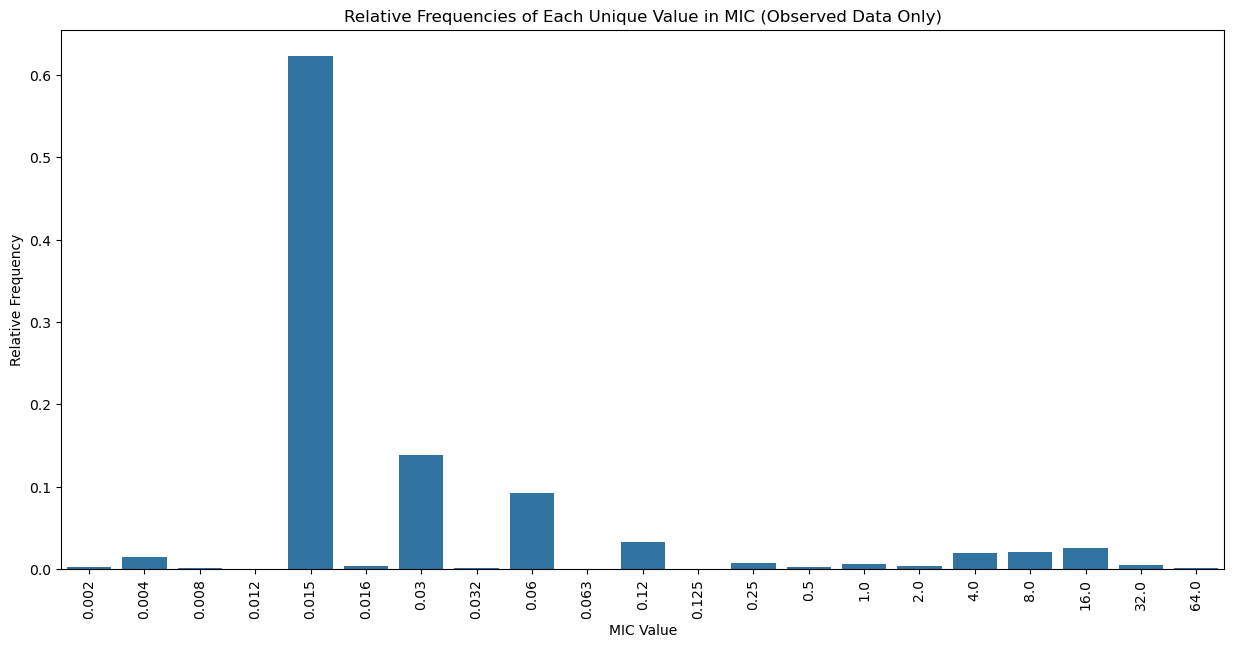

In [113]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming df is your DataFrame and 'mic' is the column of interest
mic_value_counts = df['mic'].dropna().value_counts()

# Normalize the counts to get relative frequencies
total_count = mic_value_counts.sum()
mic_counts_relative = mic_value_counts / total_count

# Bar plot for relative frequencies of each unique value in 'mic' excluding missing values
plt.figure(figsize=(15, 7))
sns.barplot(x=mic_counts_relative.index, y=mic_counts_relative.values)
plt.title('Relative Frequencies of Each Unique Value in MIC (Observed Data Only)')
plt.xlabel('MIC Value')
plt.ylabel('Relative Frequency')
plt.xticks(rotation=90)
plt.show()

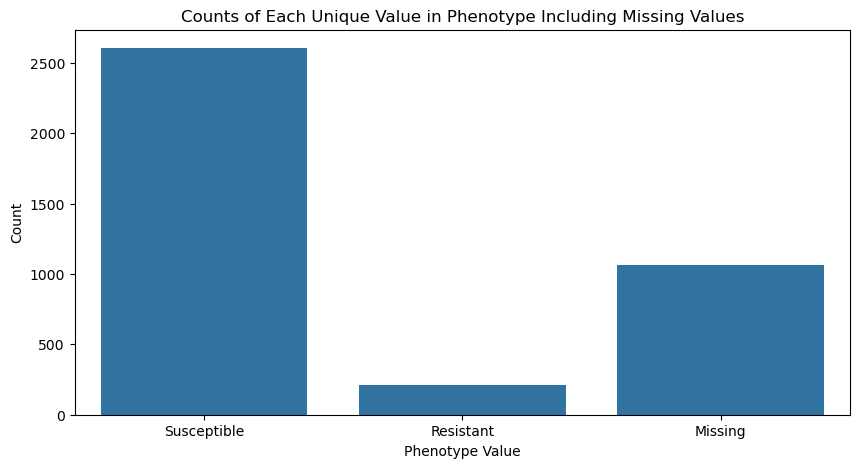

In [114]:
# Count the values for 'phenotype' including missing values
phenotype_value_counts = df['phenotype'].value_counts()
missing_phenotype_values = df['phenotype'].isna().sum()

# Create a new Series to include missing values count
phenotype_counts_with_missing = pd.concat([phenotype_value_counts, pd.Series({'Missing': missing_phenotype_values})])

# Bar plot for counts of each unique value in 'phenotype' including missing values
plt.figure(figsize=(10, 5))
sns.barplot(x=phenotype_counts_with_missing.index, y=phenotype_counts_with_missing.values)
plt.title('Counts of Each Unique Value in Phenotype Including Missing Values')
plt.xlabel('Phenotype Value')
plt.ylabel('Count')
plt.show()

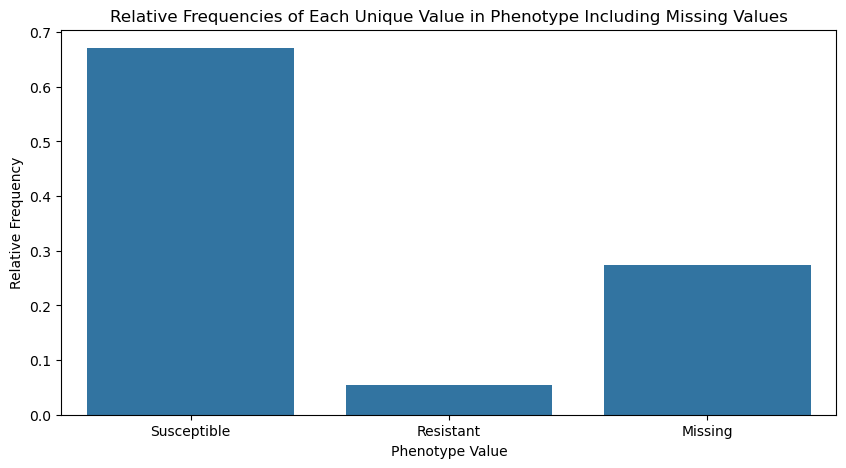

In [115]:
# Normalize the counts to get relative frequencies
total_phenotype_count = phenotype_counts_with_missing.sum()
phenotype_counts_relative = phenotype_counts_with_missing / total_phenotype_count

# Bar plot for relative frequencies of each unique value in 'phenotype' including missing values
plt.figure(figsize=(10, 5))
sns.barplot(x=phenotype_counts_relative.index, y=phenotype_counts_relative.values)
plt.title('Relative Frequencies of Each Unique Value in Phenotype Including Missing Values')
plt.xlabel('Phenotype Value')
plt.ylabel('Relative Frequency')
plt.show()

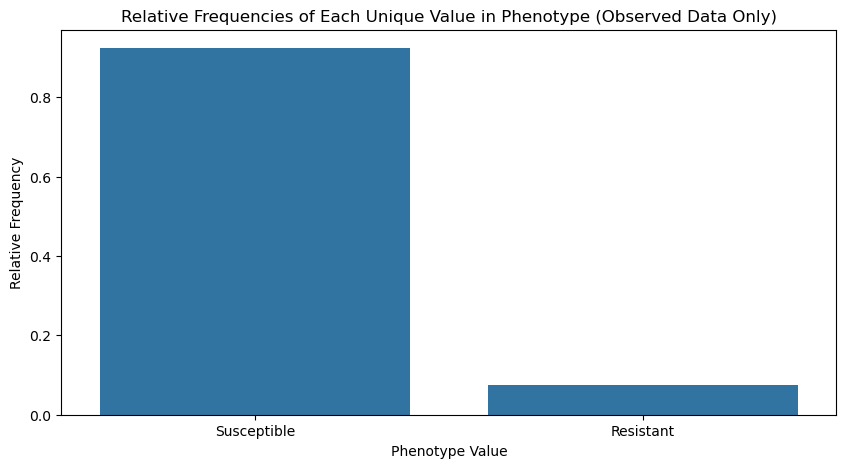

In [116]:
# Normalize the counts to get relative frequencies, ignoring missing values
phenotype_counts_relative_no_missing = phenotype_value_counts / phenotype_value_counts.sum()

# Bar plot for relative frequencies of each unique value in 'phenotype' excluding missing values
plt.figure(figsize=(10, 5))
sns.barplot(x=phenotype_counts_relative_no_missing.index, y=phenotype_counts_relative_no_missing.values)
plt.title('Relative Frequencies of Each Unique Value in Phenotype (Observed Data Only)')
plt.xlabel('Phenotype Value')
plt.ylabel('Relative Frequency')
plt.show()

In [117]:
# Create a bivariate table of 'mic' and 'phenotype' counts, including missing values
bivariate_table = pd.crosstab(df['mic'], df['phenotype'], margins=True, margins_name="Total", dropna=False)

# Display the bivariate table
print(bivariate_table)

phenotype  Resistant  Susceptible   NaN   Total
mic                                            
0.002              0            8     0     8.0
0.004              0           40     0    40.0
0.008              0            3     0     3.0
0.012              0            1     0     1.0
0.015              0         1757     0  1757.0
0.016              0           11     0    11.0
0.03               0          391     0   391.0
0.032              0            3     0     3.0
0.06               0          260     0   260.0
0.063              0            1     0     1.0
0.12               0           91     0    91.0
0.125              0            1     0     1.0
0.25               0           19     0    19.0
0.5                0            6     0     6.0
1.0                6           12     0    18.0
2.0                9            0     0     9.0
4.0               54            0     0    54.0
8.0               57            0     0    57.0
16.0              71            0     0 

In [118]:
# Calculate the percentage of missing values for 'mic'
mic_missing_percentage = (missing_values / df.shape[0]) * 100
print(f"Percentage of missing values in 'mic': {mic_missing_percentage:.2f}%")

# Calculate the percentage of missing values for 'phenotype'
phenotype_missing_percentage = (missing_phenotype_values / df.shape[0]) * 100
print(f"Percentage of missing values in 'phenotype': {phenotype_missing_percentage:.2f}%")


Percentage of missing values in 'mic': 27.39%
Percentage of missing values in 'phenotype': 27.39%


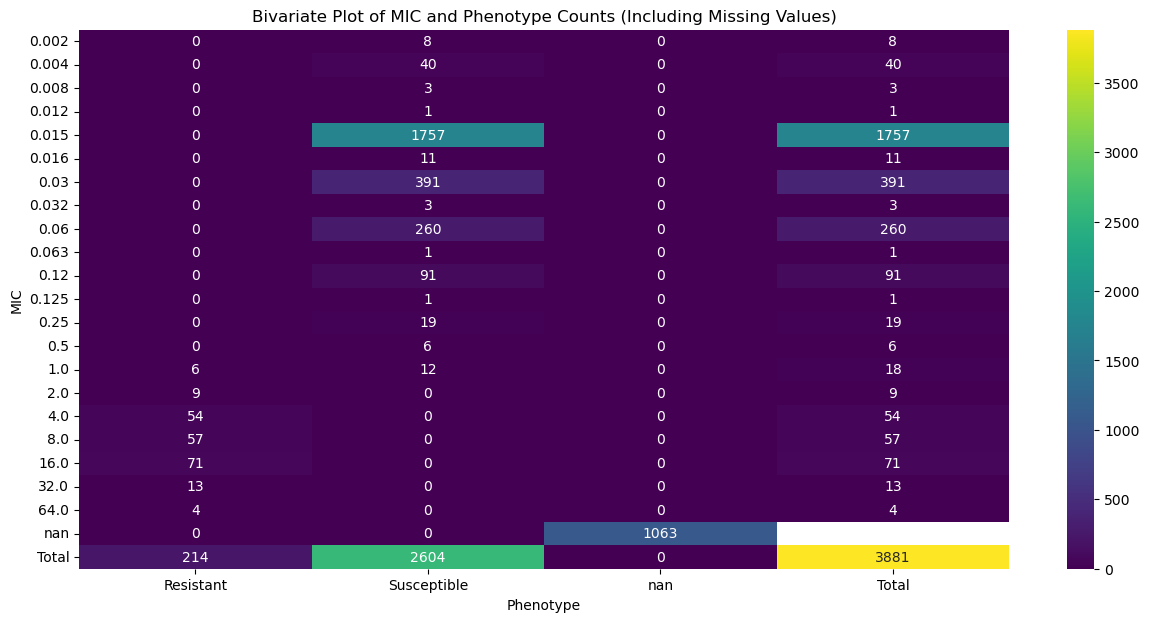

In [119]:
# Create a bivariate plot of 'mic' and 'phenotype' counts, including missing values
plt.figure(figsize=(15, 7))
sns.heatmap(bivariate_table, annot=True, fmt='g', cmap='viridis')
plt.title('Bivariate Plot of MIC and Phenotype Counts (Including Missing Values)')
plt.xlabel('Phenotype')
plt.ylabel('MIC')
plt.show()

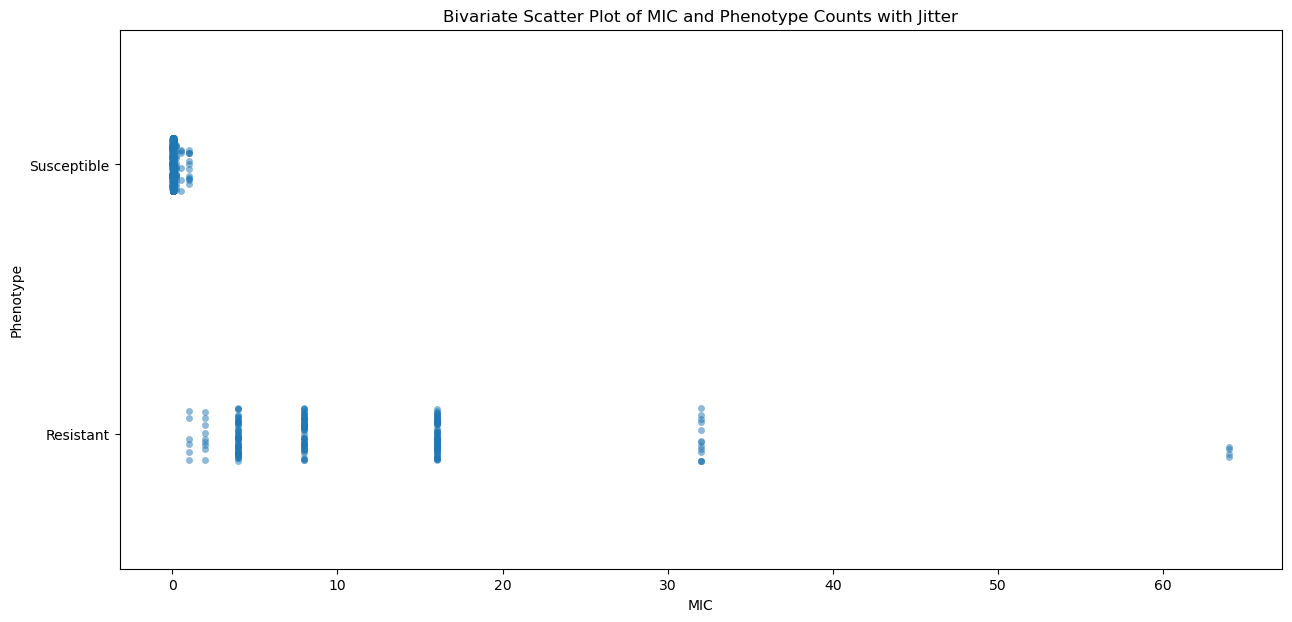

In [120]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a bivariate scatter plot of 'mic' and 'phenotype' counts with jitter
plt.figure(figsize=(15, 7))
sns.stripplot(x='mic', y='phenotype', data=df, alpha=0.5, jitter=True)
plt.title('Bivariate Scatter Plot of MIC and Phenotype Counts with Jitter')
plt.xlabel('MIC')
plt.ylabel('Phenotype')
plt.show()


## Missingness Thoughts

About 30% of the data is missing.


### MIC

30% missing labels for MIC.

#### Phenotype

About 30% missing labels for phenotype.

The missingness is always consistent between MIC and phenotype. This suggests that the missingness is not completely at random.


Do we know anything about missingness from the context of the problem?

It would seem best to **account for this downstream** after splitting.

Some possible strategies would be:
- Impute missing values
- MICE
- Drop missing values
- Use a model that can handle missing values


In [121]:
# Create a dictionary of MIC values and their relative frequencies
mic_relative_freq_dict = mic_counts_relative.to_dict()

# Display the dictionary
print(mic_relative_freq_dict)

{0.015: 0.6234918381831086, 0.03: 0.13875088715400993, 0.06: 0.09226401703335699, 0.12: 0.032292405961674944, 16.0: 0.025195173882185947, 8.0: 0.020227111426543647, 4.0: 0.0191625266146203, 0.004: 0.014194464158977998, 0.25: 0.00674237047551455, 1.0: 0.0063875088715401, 32.0: 0.0046132008516678496, 0.016: 0.0039034776437189495, 2.0: 0.00319375443577005, 0.002: 0.0028388928317956, 0.5: 0.0021291696238466998, 64.0: 0.0014194464158978, 0.032: 0.0010645848119233499, 0.008: 0.0010645848119233499, 0.063: 0.00035486160397445, 0.125: 0.00035486160397445, 0.012: 0.00035486160397445}


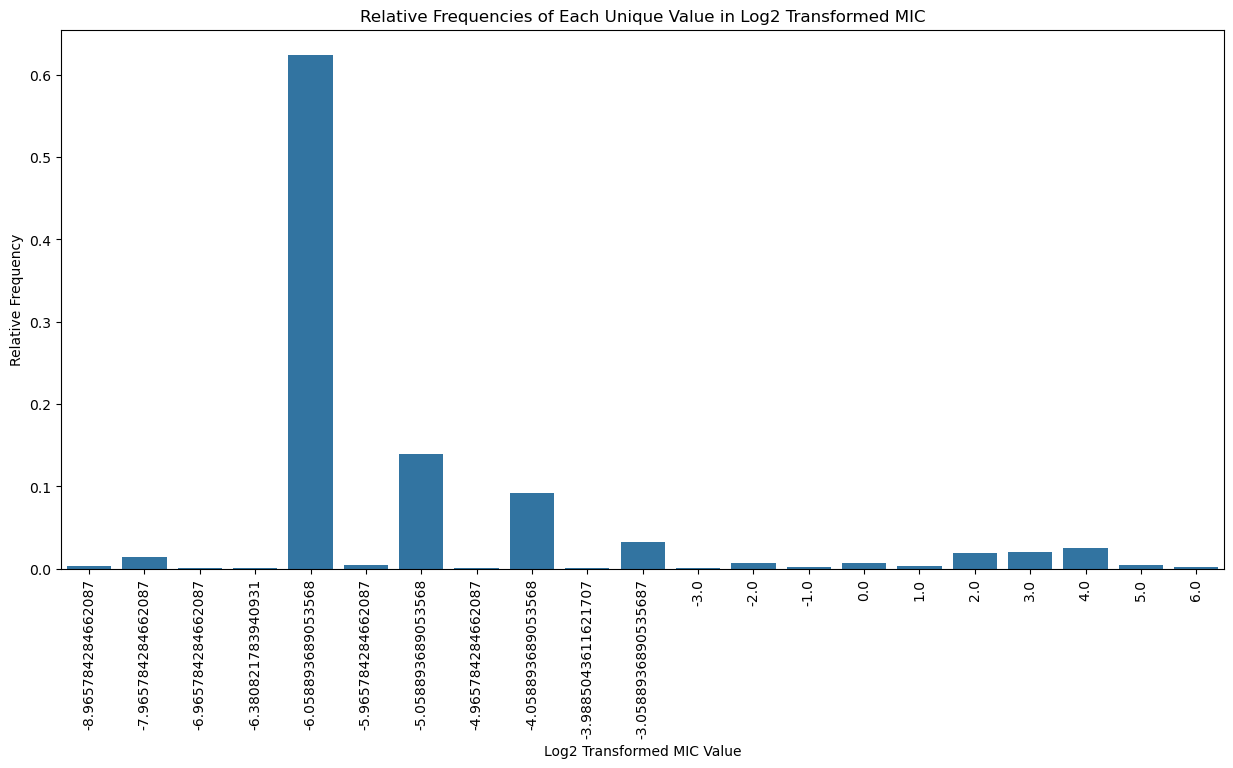

In [122]:
import numpy as np

# Apply log base 2 transform to the 'mic' values
df['mic_log2'] = np.log2(df['mic'])

# Drop any rows where the log transform resulted in -inf (due to log(0))
df = df.replace(-np.inf, np.nan).dropna(subset=['mic_log2'])

# Calculate the relative counts of the transformed 'mic' values
mic_log2_value_counts = df['mic_log2'].value_counts(normalize=True).sort_index()

# Plot the distribution of relative counts for the log-transformed 'mic' values
plt.figure(figsize=(15, 7))
sns.barplot(x=mic_log2_value_counts.index, y=mic_log2_value_counts.values)
plt.title('Relative Frequencies of Each Unique Value in Log2 Transformed MIC')
plt.xlabel('Log2 Transformed MIC Value')
plt.ylabel('Relative Frequency')
plt.xticks(rotation=90)
plt.show()

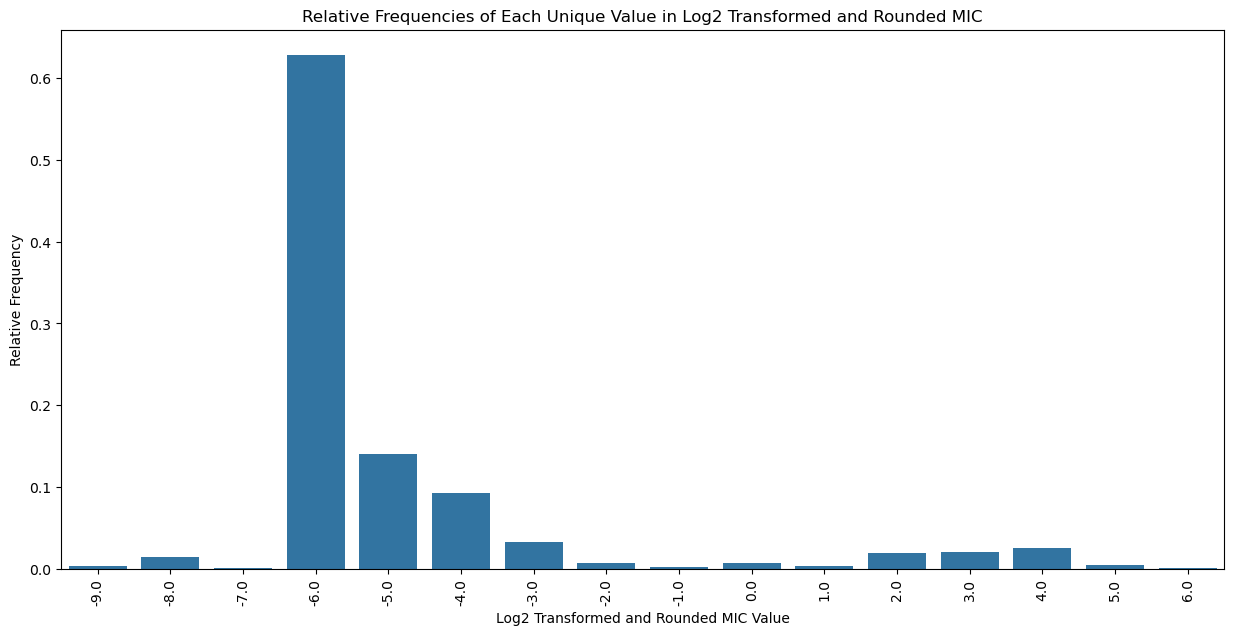

In [123]:
# Apply log base 2 transform to the 'mic' values and round to the nearest integer
df['mic_log2_rounded'] = np.log2(df['mic']).round()

# Drop any rows where the log transform resulted in -inf (due to log(0))
df = df.replace(-np.inf, np.nan).dropna(subset=['mic_log2_rounded'])

# Calculate the relative counts of the transformed 'mic' values
mic_log2_rounded_value_counts = df['mic_log2_rounded'].value_counts(normalize=True).sort_index()

# Plot the distribution of relative counts for the log-transformed and rounded 'mic' values
plt.figure(figsize=(15, 7))
sns.barplot(x=mic_log2_rounded_value_counts.index, y=mic_log2_rounded_value_counts.values)
plt.title('Relative Frequencies of Each Unique Value in Log2 Transformed and Rounded MIC')
plt.xlabel('Log2 Transformed and Rounded MIC Value')
plt.ylabel('Relative Frequency')
plt.xticks(rotation=90)
plt.show()

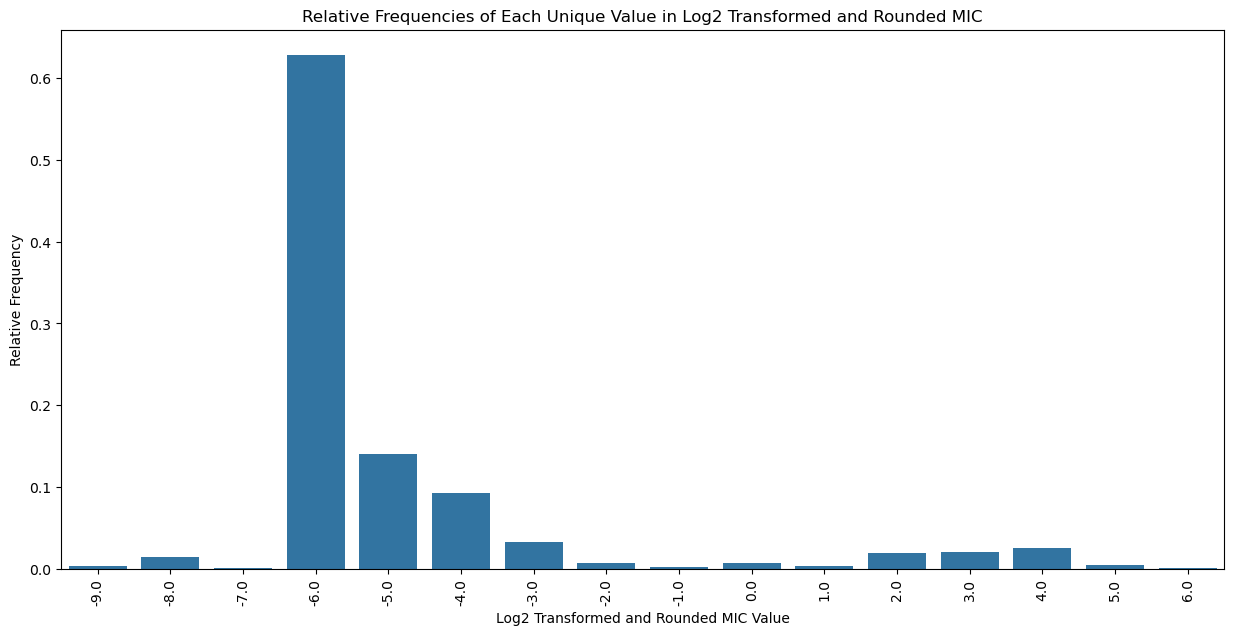

{-9.0: 0.0028388928317956,
 -8.0: 0.014194464158977998,
 -7.0: 0.0010645848119233499,
 -6.0: 0.627750177430802,
 -5.0: 0.13981547196593327,
 -4.0: 0.09261887863733144,
 -3.0: 0.032647267565649396,
 -2.0: 0.00674237047551455,
 -1.0: 0.0021291696238466998,
 0.0: 0.0063875088715401,
 1.0: 0.00319375443577005,
 2.0: 0.0191625266146203,
 3.0: 0.020227111426543647,
 4.0: 0.025195173882185947,
 5.0: 0.0046132008516678496,
 6.0: 0.0014194464158978}

In [126]:

# Annotate each bar with its relative frequency
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.2%}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

df['mic_log2_rounded'] = np.log2(df['mic']).round()

# Drop any rows where the log transform resulted in -inf (due to log(0))
df = df.replace(-np.inf, np.nan).dropna(subset=['mic_log2_rounded'])

# Calculate the relative counts of the transformed 'mic' values
mic_log2_rounded_value_counts = df['mic_log2_rounded'].value_counts(normalize=True).sort_index()

# Plot the distribution of relative counts for the log-transformed and rounded 'mic' values
plt.figure(figsize=(15, 7))
sns.barplot(x=mic_log2_rounded_value_counts.index, y=mic_log2_rounded_value_counts.values)
plt.title('Relative Frequencies of Each Unique Value in Log2 Transformed and Rounded MIC')
plt.xlabel('Log2 Transformed and Rounded MIC Value')
plt.ylabel('Relative Frequency')
plt.xticks(rotation=90)
plt.show()

mic_log2_rounded_value_counts.to_dict()

In [127]:
mic_log2_rounded_value_counts.to_dict()

{-9.0: 0.0028388928317956,
 -8.0: 0.014194464158977998,
 -7.0: 0.0010645848119233499,
 -6.0: 0.627750177430802,
 -5.0: 0.13981547196593327,
 -4.0: 0.09261887863733144,
 -3.0: 0.032647267565649396,
 -2.0: 0.00674237047551455,
 -1.0: 0.0021291696238466998,
 0.0: 0.0063875088715401,
 1.0: 0.00319375443577005,
 2.0: 0.0191625266146203,
 3.0: 0.020227111426543647,
 4.0: 0.025195173882185947,
 5.0: 0.0046132008516678496,
 6.0: 0.0014194464158978}

In [136]:
# Round the relative frequencies to 3 significant figures
mic_log_2_counts_relative_rounded = mic_log2_rounded_value_counts.round(3)

mic_log_2_counts_relative_rounded

mic_log2_rounded
-9.0    0.003
-8.0    0.014
-7.0    0.001
-6.0    0.628
-5.0    0.140
-4.0    0.093
-3.0    0.033
-2.0    0.007
-1.0    0.002
 0.0    0.006
 1.0    0.003
 2.0    0.019
 3.0    0.020
 4.0    0.025
 5.0    0.005
 6.0    0.001
Name: proportion, dtype: float64

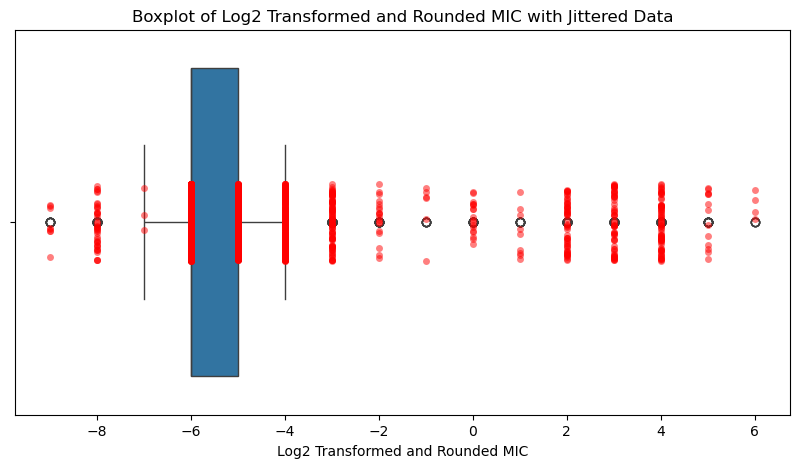

In [141]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['mic_log2_rounded'])
sns.stripplot(x=df['mic_log2_rounded'], color='red', alpha=0.5, jitter=True)
plt.title('Boxplot of Log2 Transformed and Rounded MIC with Jittered Data')
plt.xlabel('Log2 Transformed and Rounded MIC')
plt.show()

In [ ]:
# Calculate the percentage of missing values for each column
missing_percentage = df.isnull().mean() * 100

# Display the percentage of missing values
print(missing_percentage)

In [137]:
# Create a dictionary of relative counts for phenotype
phenotype_relative_freq_dict = phenotype_counts_relative.to_dict()

# Display the dictionary
print(phenotype_relative_freq_dict)

{'Susceptible': 0.6709610925019325, 'Resistant': 0.055140427724813194, 'Missing': 0.2738984797732543}


In [138]:
# Create a dictionary of relative counts for phenotype, remove missing values and round to 3 significant figures
phenotype_counts_relative_no_missing = phenotype_counts_relative_no_missing.round(3)
phenotype_relative_freq_dict_no_missing = phenotype_counts_relative_no_missing.to_dict()

# Display the dictionary
print(phenotype_relative_freq_dict_no_missing)

{'Susceptible': 0.924, 'Resistant': 0.076}


## Outliers Conclusion

Using the empirical distribution of phenotype and mic, we can draw some conclusions about outliers.



### PhenoType

The phenotype is class data by default. It is not too imbalanced, with a ratio of 1:3 acceptable for most classes of algorithms. There seems to be little need to remove outliers, or account for imbalance.

### MIC

The MIC is continuous data with 21 unique values at differing frequencies. It is right skewed, but after a log transformation, some rounding, the skew is much more controlled over the 16 unique values. This could be modelled as a continuous variable, or as a ordinal class variable after rounding.


Is the test metric for the competition sensitive to predicted values or only ranges for mic? For now, the conservative option would be to go with numeric label for MIC, log base 2 transformed and rounded.

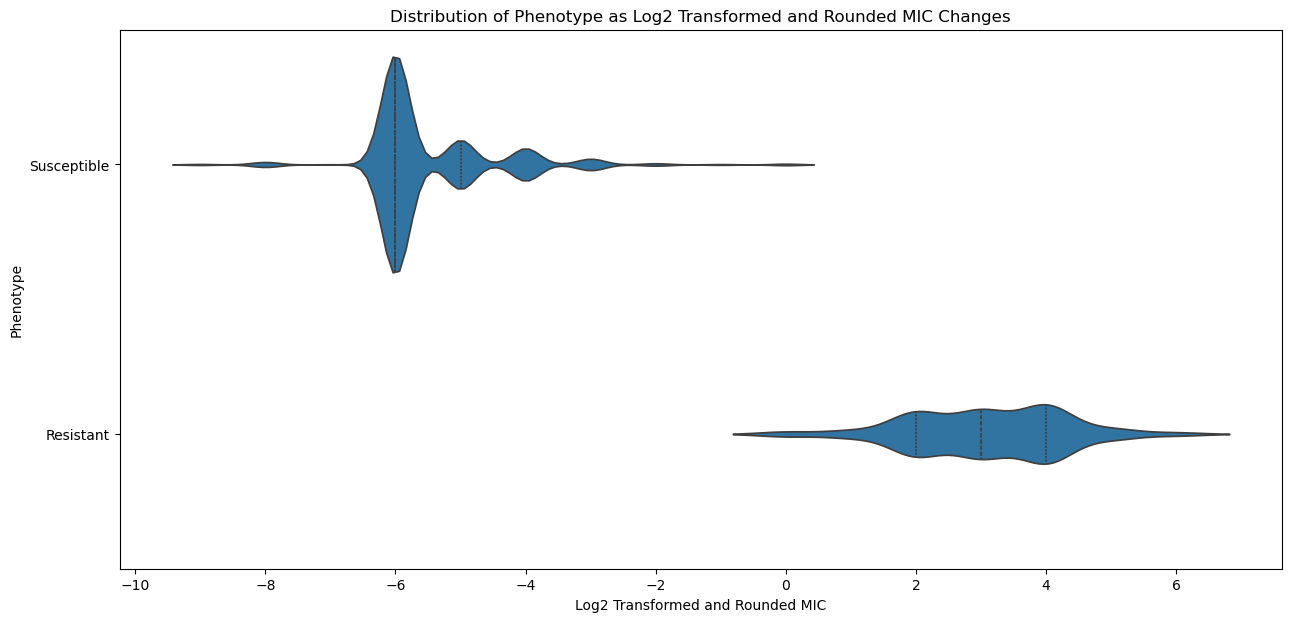

In [146]:
plt.figure(figsize=(15, 7))
sns.violinplot(x='mic_log2_rounded', y='phenotype', data=df, inner='quartile')
plt.title('Distribution of Phenotype as Log2 Transformed and Rounded MIC Changes')
plt.xlabel('Log2 Transformed and Rounded MIC')
plt.ylabel('Phenotype')
plt.show()

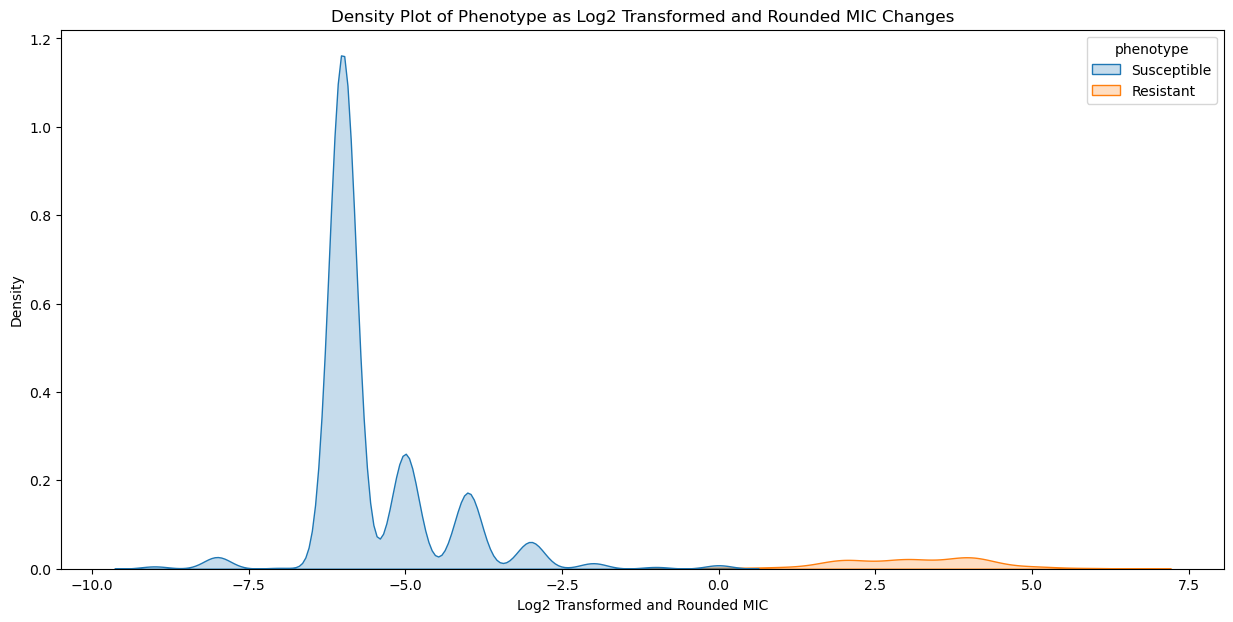

In [147]:
plt.figure(figsize=(15, 7))
sns.kdeplot(x='mic_log2_rounded', hue='phenotype', data=df, fill=True)
plt.title('Density Plot of Phenotype as Log2 Transformed and Rounded MIC Changes')
plt.xlabel('Log2 Transformed and Rounded MIC')
plt.ylabel('Density')
plt.show()

Since the two labels are likely complementary (i.e., when one is “Resistant”, the other is “Susceptible”), a multioutput model could be advantageous. Here’s why:

* Multioutput models predict both labels simultaneously, leveraging any potential correlations between the outputs (such as if one label being 1 suggests the other will be 0). This often improves performance when the labels are not fully independent.
* ndividual models predict each label separately. This can work well, but it might ignore any interdependencies between the labels.

Given the inherent relationship between “Resistant” and “Susceptible”, a multioutput model is the more natural choice, as it can capture the structure of the problem better and may provide more accurate predictions.

## Actions


* No treatment of outliers, nothing too severe

* The data set is small, so use a simple train-test split, but use cross-validation to have a stable evaluation metric.

* Treat mic as continuous variable, log base 2 transformed and rounded.

* Class imbalance is not severe, no need to treat.

* Need pre-processing pipeline to transform labels


### Label Transformer for MIC

To create a label transformer for the `mic` values that applies a log2 transformation and rounds to 3 significant figures, we can use `FunctionTransformer` from `sklearn.preprocessing`. This transformer can then be used in a pipeline.

Here's the code to create the transformer:

```python
from sklearn.preprocessing import FunctionTransformer
import numpy as np

# Define the transformation function
def log2_transform_and_round(X):
    return np.round(np.log2(X), 3)

# Create the FunctionTransformer
mic_label_transformer = FunctionTransformer(log2_transform_and_round, validate=True)

# Example usage
# transformed_mic = mic_label_transformer.transform(df['mic'].values.reshape(-1, 1))
```

This transformer can be integrated into a pipeline for preprocessing the `mic` labels.

### Implied Function Transformer

In [174]:
import numpy as np
from sklearn.preprocessing import FunctionTransformer

# Define the transformation function
def log2_transform_and_round(X):
    # Apply transformation only to non-missing values
    mask = ~np.isnan(X)
    X_transformed = np.where(mask, np.round(np.log2(X), 0), X)
    return X_transformed

# Create the FunctionTransformer
mic_label_transformer = FunctionTransformer(log2_transform_and_round, validate=False)

### Test Transformer

In [175]:
# Create example data with missing values
data_with_missing_values = np.array([
    [1.0, 2.0, np.nan],
    [4.0, np.nan, 6.0],
    [7.0, 8.0, 9.0],
    [np.nan, 11.0, 12.0]
])

# Transform the data
transformed_data = mic_label_transformer.transform(data_with_missing_values)

print("Original Data:")
print(data_with_missing_values)
print("\nTransformed Data:")
print(transformed_data)

Original Data:
[[ 1.  2. nan]
 [ 4. nan  6.]
 [ 7.  8.  9.]
 [nan 11. 12.]]

Transformed Data:
[[ 0.  1. nan]
 [ 2. nan  3.]
 [ 3.  3.  3.]
 [nan  3.  4.]]
